# Exercise 5
Given a dataset that contains information about different types of flowers (e.g., Iris dataset), perform classification using the k-Nearest Neighbors (kNN) algorithm. Evaluate the performance of the model by calculating its accuracy and visualize the results using appropriate techniques.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv("iris_dataset.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
Y = df["target"]

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
encoder = LabelEncoder()

Y_train_enc = encoder.fit_transform(Y_train)
Y_test_enc = encoder.transform(Y_test)

In [7]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_scaled, Y_train_enc)

KNeighborsClassifier(n_neighbors=3)

In [8]:
Y_pred = knn.predict(X_test_scaled)

In [9]:
accuracy = accuracy_score(Y_test_enc, Y_pred)
print(f"The KNN Classifier is {accuracy * 100:.0f}% accurate")

The KNN Classifier is 100% accurate


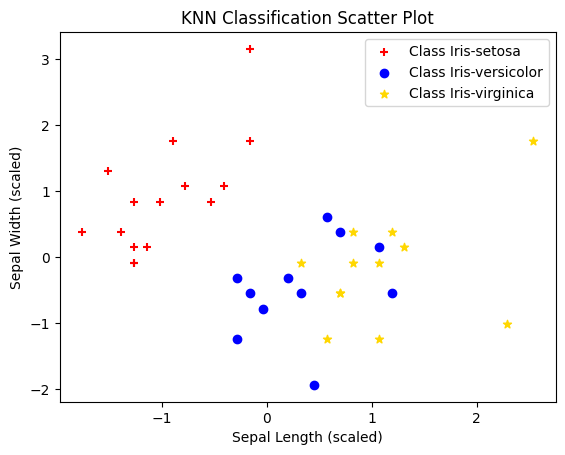

In [10]:
labels = encoder.classes_

markers = ["+", "o", "*"]
colors = ["red", "blue", "gold"]

for i, label in enumerate(labels):
    class_points = (Y_pred == i)
    plt.scatter(X_test_scaled[class_points, 0], X_test_scaled[class_points, 1], label=f'Class {label}', marker=markers[i], color=colors[i])
    plt.title("KNN Classification Scatter Plot")
    plt.xlabel("Sepal Length (scaled)")
    plt.ylabel("Sepal Width (scaled)")
    plt.legend()